### Perceptron

1. Threshold Logical Unit:

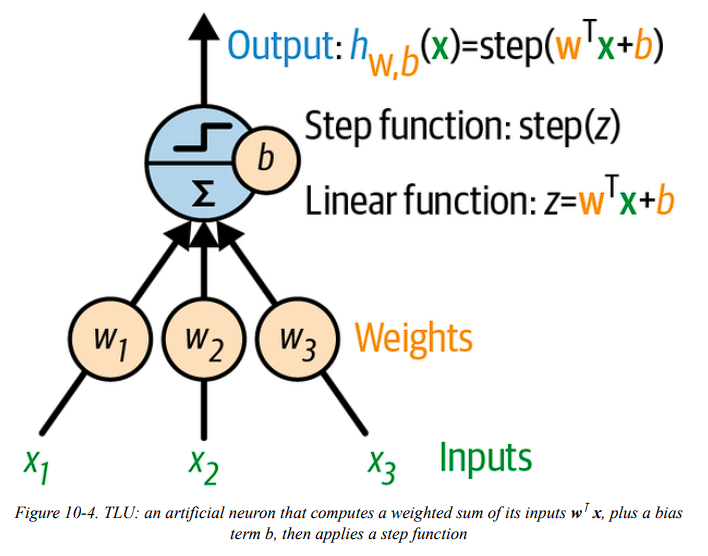

2. A perceptron is composed of one or more TLUs organized in a single layer,
where every TLU is connected to every input. Such a layer is called a fully
connected layer, or a dense layer.

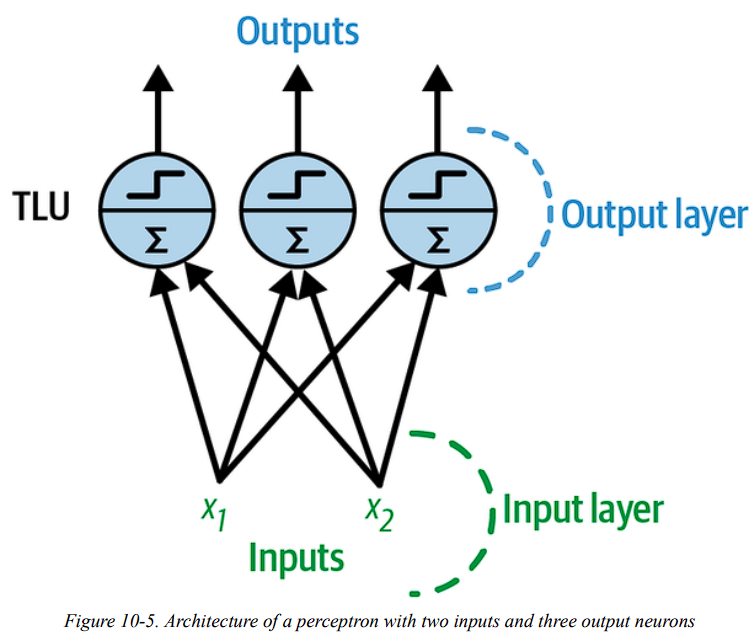

3. 
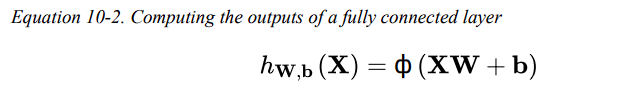

In This Equation:
* X -> input features matrix 1 row per instance and one col per feature
* W -> weight matrix contain all connection weights one row per input and one col per neuron
* b -> bias vector contains all the bias terms: one per neuron
*  ϕ ->activation function: known as step function when artificial neurons are TLU's.

> NOTE:
In mathematics, the sum of a matrix and a vector is undefined. However, in data science,
we allow “broadcasting”: adding a vector to a matrix means adding it to every row in
the matrix. So, XW + b first multiplies X by W—which results in a matrix with one row
per instance and one column per output—then adds the vector b to every row of that
matrix, which adds each bias term to the corresponding output, for every instance.
Moreover, ϕ is then applied itemwise to each item in the resulting matrix.

4. Hebb’s rule (or Hebbian learning):
“Cells that fire together, wire together”;
that is, the connection weight between two neurons tends to increase when they fire simultaneously.

5. the perceptron is fed one training
instance at a time, and for each instance it makes its predictions. For every
output neuron that produced a wrong prediction, it reinforces the connection
weights from the inputs that would have contributed to the correct
prediction.

Equation 10-3 Perceptron learning rule (weight update)
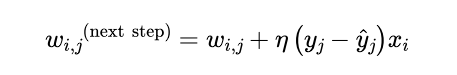

In this equation:
* η -> learning rate
* w_i,j -> connection weight between the ith input and the jth neuron.
* x_i -> ith input of the current trainig instance
* ^y_j ->output of the jth ouput neuron for the current training instance.
* y_j -> target output of the jth output neuron for the current training instance.

6. perceptron convergence theorem:
The decision boundary of each output neuron is linear, so perceptrons are
incapable of learning complex patterns (just like logistic regression
classifiers). However, if the training instances are linearly separable,
Rosenblatt demonstrated that this algorithm would converge to a solution.

7. Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier
with the following hyperparameters: loss="perceptron",
learning_rate="constant", eta0=1 (the learning rate), and
penalty=None (no regularization).

> NOTE:
Contrary to logistic regression classifiers, perceptrons do not output a class probability.
This is one reason to prefer logistic regression over perceptrons. Moreover, perceptrons
do not use any regularization by default, and training stops as soon as there are no more
prediction errors on the training set, so the model typically does not generalize as well
as logistic regression or a linear SVM classifier. However, perceptrons may train a bit
faster.


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = (iris.target == 0) #iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2,0.5],[3,1]]
y_pred = per_clf.predict(X_new) # predicts True and False for these 2 Flowers

In [3]:
y_pred

array([ True, False])

In [4]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

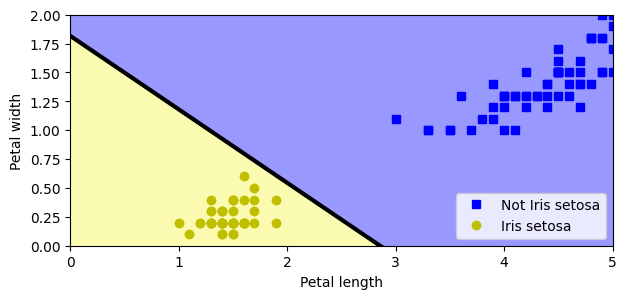

In [5]:
# extra code – plots the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

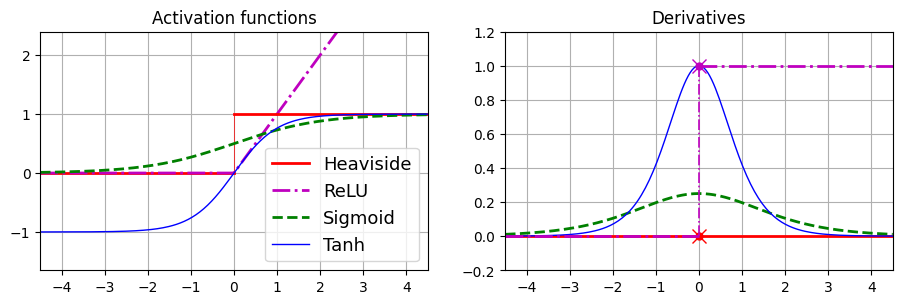

In [7]:
# extra code – this cell generates and saves Figure 10–8

from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

8. The Multilayer Perceptrons and Backpropogation:
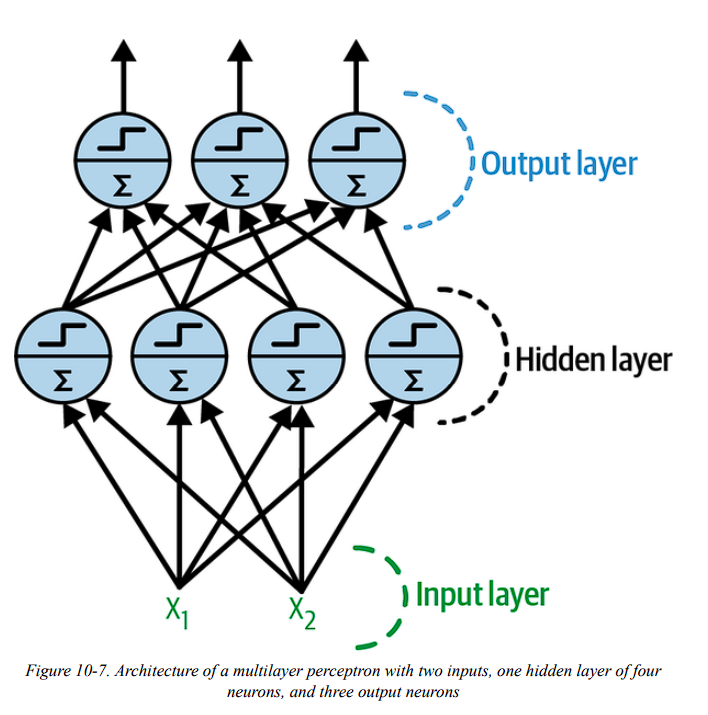

>NOTE:
The signal flows only in one direction (from the inputs to the outputs), so this
architecture is an example of a feedforward neural network (FNN).

* When an ANN contains a deep stack of hidden layers, it is called a deep
neural network (DNN). 

* reverse-mode automatic
differentiation (or reverse-mode autodiff for short):
In just two passes
through the network (one forward, one backward), it is able to compute the
gradients of the neural network’s error with regard to every single model
parameter.

*  backpropagation (or backprop for short):
If you
repeat this process of computing the gradients automatically and taking a
gradient descent step, the neural network’s error will gradually drop until it
eventually reaches a minimum.

> NOTE:
There are various autodiff techniques, with different pros and cons. Reverse-mode
autodiff is well suited when the function to differentiate has many variables (e.g.,
connection weights and biases) and few outputs (e.g., one loss).

* BackProp working:
    * It handles one mini-batch at a time and it goes thru the full training set multiple times. Each pass is called an epoch.

    * Each mini-batch enters the network thru the input  layer. The
    algorithm then computes the output of all the neurons in the first
    hidden layer, for every instance in the mini-batch. The result is passed
    on to the next layer, its output is computed and passed to the next
    layer, and so on until we get the output of the last layer, the output
    layer. This is the forward pass: it is exactly like     making predictions,
    except all intermediate results are preserved since they are needed for
    the backward pass.

    * Next, the algorithm measures the network’s output error (i.e., it uses a  
    loss function that compares the desired output and the actual output of
    the network, and returns some measure of the error).

    * Then it computes how much each output bias and each connection to
    the output layer contributed to the error. This is done analytically by
    applying the chain rule (perhaps the most fundamental rule in
    calculus), which makes this step fast and precise.

    * The algorithm then measures how much of these error contributions
    came from each connection in the layer below, again using the chain
    rule, working backward until it reaches the input layer. As explained
    earlier, this reverse pass efficiently measures the error gradient across
    all the connection weights and biases in the network by propagating the error gradient backward through the network (hence the name of
    the algorithm).

    * Finally, the algorithm performs a gradient descent step to tweak all the
    connection weights in the network, using the error gradients it just
    computed.

>Warning: It is important to initialize all the hidden layers’ connection weights randomly, or else
training will fail. For example, if you initialize all weights and biases to zero, then all
neurons in a given layer will be perfectly identical, and thus backpropagation will affect
them in exactly the same way, so they will remain identical. In other words, despite
having hundreds of neurons per layer, your model will act as if it had only one neuron
per layer: it won’t be too smart. If instead you randomly initialize the weights, you
break the symmetry and allow backpropagation to train a diverse team of neurons.

* It uses sigmoid function as activation function. cause gradient descent can't work on flat surfaces.

* other popular choices for activation function:
    * The Hyperbolic tangent function: tanh(z) = 2σ(2z) – 1.  its output value ranges from –1 to 1 which  tends
    to make each layer’s output more or less centered around 0 at the
    beginning of training, which often helps speed up convergence.

    * The rectified linear unit function: ReLU(z) = max(0, z): The ReLU function is continuous but unfortunately not differentiable at
    z = 0 (the slope changes abruptly, which can make gradient descent
    bounce around) , and its derivative is 0 for z < 0.
    In practice, however, it
    works very well and has the advantage of being fast to compute, so it
    has become the default. Importantly, the fact that it does not have a
    maximum output value helps reduce some issues during gradient
    descent.

    * softplus(z) = log(1 + exp(z)) it's a smooth variant of ReLU is close to 0 when z is negative, and close to z when z is
    positive.

9. Regression MLPs

* Use Cases:  
    * if you
    want to guarantee that the output will always be positive, then you should
    use the ReLU activation function in the output layer, or the softplus
    activation function.

    * if you want to guarantee that the predictions will always
    fall within a given range of values, then you should use the sigmoid
    function or the hyperbolic tangent, and scale the targets to the appropriate
    range: 0 to 1 for sigmoid and –1 to 1 for tanh

>Note:  MLPRegressor
class does not support activation functions in the output layer.

> WARNING:
Building and training a standard MLP with Scikit-Learn in just a few lines of code is
very convenient, but the neural net features are limited. This is why we will switch to
Keras in the second part of this chapter.

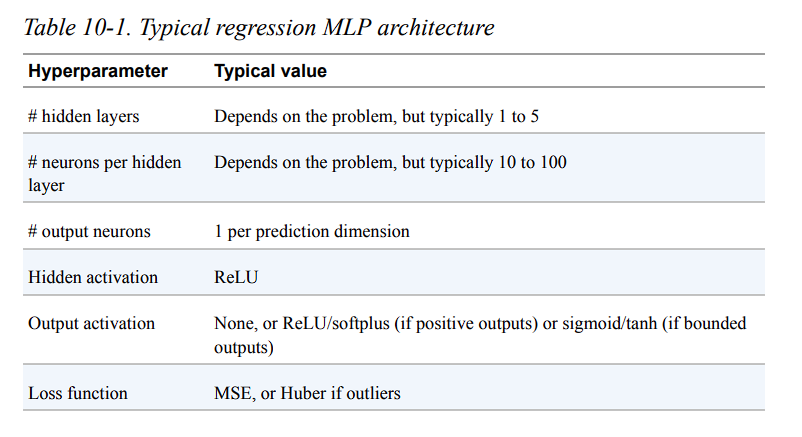




In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

In [10]:
rmse

0.5053326657968585

10. Classification MLPs

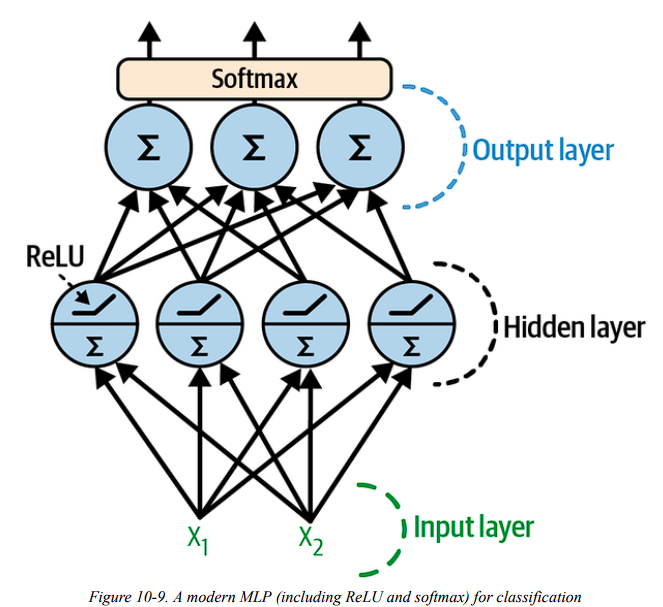

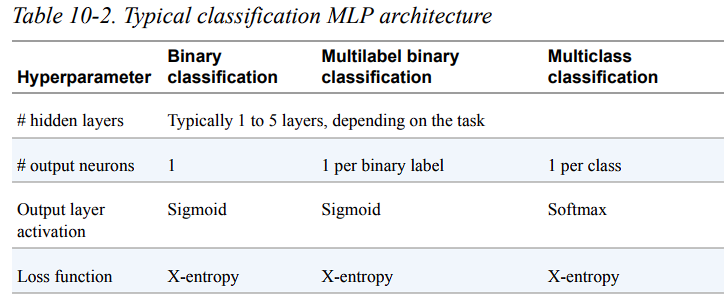




In [11]:
# extra code – this was left as an exercise for the reader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

### Implementing MLPs with Keras

1. Building An Image Classifier Using the Sequential API:

In [12]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000],y_train_full[:-5000]
X_val,y_val = X_train_full[-5000:],y_train_full[-5000:]

In [2]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [13]:
"""For simplicity, we’ll scale the pixel intensities down to the 0–1 range by
dividing them by 255.0 (this also converts them to floats):"""

X_train,X_val,X_test = X_train / 255. , X_val/255. , X_test/255.

In [14]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [15]:
class_names[y_train[0]]

'Ankle boot'

### creating the model using the sequential API

In [7]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


Let's go thru this code line by line:
* First, set TensorFlow’s random seed to make the        results reproducible:
    the random weights of the hidden layers and the output layer will be
    the same every time you run the notebook. You could also choose to
    use the tf.keras.utils.set_random_seed() function, which
    conveniently sets the random seeds for TensorFlow, Python
    (random.seed()), and NumPy (np.random.seed()).


* The next line creates a Sequential model. This is the simplest kind of
    Keras model for neural networks that are just composed of a single
    stack of layers connected sequentially. This is called the sequential
    API.

* Next, we build the first layer (an Input layer) and add it to the model.
    We specify the input shape, which doesn’t include the batch size, only
    the shape of the instances. Keras needs to know the shape of the inputs
    so it can determine the shape of the connection weight matrix of the
    first hidden layer.

* Then we add a Flatten layer. Its role is to convert each input image
    into a 1D array: for example, if it receives a batch of shape [32, 28,
    28], it will reshape it to [32, 784]. In other words, if it receives input
    data X, it computes X.reshape(-1, 784). This layer doesn’t have any
    parameters; it’s just there to do some simple preprocessing.

* Next we add a Dense hidden layer with 300 neurons. It will use the
    ReLU activation function. Each Dense layer manages its own weight
    matrix, containing all the connection weights between the neurons and
    their inputs. It also manages a vector of bias terms (one per neuron).
    When it receives some input data, it computes Equation 10-2.

* Then we add a second Dense hidden layer with 100 neurons, also
    using the ReLU activation function.

* Finally, we add a Dense output layer with 10 neurons (one per class),
    using the softmax activation function because the classes are
    exclusive.



In [16]:
"""Instead of adding the layers one by one as we just did, it’s often more
convenient to pass a list of layers when creating the Sequential model.
You can also drop"""

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [18]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [19]:
"""The model’s summary() method displays all the model’s layers, including
each layer’s name (which is automatically generated unless you set it when
creating the layer), its output shape (None means the batch size can be
anything), and its number of parameters."""
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

>TIP:
All global state managed by Keras is stored in a Keras session, which you can clear
using tf.keras.backend.clear_session(). In particular, this resets the name
counters.


In [20]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [21]:
hidden1 = model.layers[1]
hidden1.name


'dense'

In [22]:
model.get_layer('dense') is hidden1

True

In [23]:
"""All the parameters of a layer can be accessed using its get_weights() and
set_weights() methods. For a Dense layer, this includes both the
connection weights and the bias terms:"""

weights, biases = hidden1.get_weights()
weights

array([[ 0.00601521,  0.02632234, -0.05872044, ...,  0.04844534,
        -0.02105512, -0.03110776],
       [-0.07058129,  0.04354303,  0.0049572 , ..., -0.07157921,
        -0.05346386,  0.04025692],
       [ 0.02257515,  0.01309854,  0.0171696 , ...,  0.05709301,
         0.02921155, -0.01087925],
       ...,
       [ 0.00449473, -0.00292236, -0.00733845, ...,  0.06371598,
         0.03977669,  0.02029963],
       [-0.01356838,  0.0636951 , -0.04757624, ..., -0.00959588,
         0.05496828, -0.01038942],
       [ 0.07165612,  0.07124309, -0.02261477, ...,  0.06783529,
        -0.02925364, -0.02253431]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [29]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


If you want to use a different
initialization method, you can set kernel_initializer (kernel is another
name for the matrix of connection weights) or bias_initializer when
creating the layer. 

>NOTE: Until the model parameters are
built, you will not be able to do certain things, such as display the model summary or
save the model. So, if you know the input shape when creating the model, it is best to
specify it.


### Compiling the model

In [30]:
"""After a model is created, you must call its compile() method to specify the
loss function and the optimizer to use. Optionally, you can specify a list of
extra metrics to compute during training and evaluation:
"""

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

>NOTE: If we
were doing binary classification or multilabel binary classification, then we
would use the "sigmoid" activation function in the output layer instead of
the "softmax" activation function, and we would use the
"binary_crossentropy" loss.

>TIP:
If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the
tf.keras.utils.to_categorical() function. To go the other way round, use the
np.argmax() function with axis=1.


>NOTE:
When using the SGD optimizer, it is important to tune the learning rate. So, you will
generally want to use optimizer=tf.keras.
optimizers.SGD(learning_rate=\__???__) to set the learning rate, rather than
optimizer="sgd", which defaults to a learning rate of 0.01.




In [31]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

### Training and evaluating the model

In [33]:
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_val,y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6778 - loss: 1.0061 - val_accuracy: 0.8270 - val_loss: 0.4994
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8265 - loss: 0.5011 - val_accuracy: 0.8386 - val_loss: 0.4514
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8449 - loss: 0.4494 - val_accuracy: 0.8466 - val_loss: 0.4295
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8535 - loss: 0.4208 - val_accuracy: 0.8500 - val_loss: 0.4156
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8603 - loss: 0.4004 - val_accuracy: 0.8530 - val_loss: 0.4061
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8652 - loss: 0.3840 - val_accuracy: 0.8566 - val_loss: 0.3973
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8698 - loss: 0.3701 - val_accuracy: 0.8592 - val_loss: 0.3897
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8732 - loss: 0.3581 - 

In [34]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [35]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


>TIP:
Instead of passing a validation set using the validation_data argument, you could set
validation_split to the ratio of the training set that you want Keras to use for
validation. For example, validation_split=0.1 tells Keras to use the last 10% of the
data (before shuffling) for validation.


The fit() method returns a History object containing the training
parameters (history.params), the list of epochs it went through
(history.epoch), and most importantly a dictionary (history.history)
containing the loss and extra metrics it measured at the end of each epoch
on the training set and on the validation set (if any)



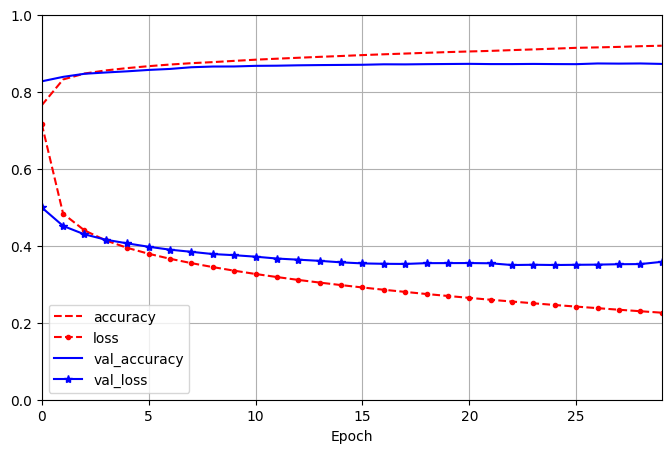

In [36]:
"""If you use this
dictionary to create a Pandas DataFrame and call its plot() method, you
get the learning curves"""

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",
    style=["r--","r--.","b-","b-*"]
)

plt.show()

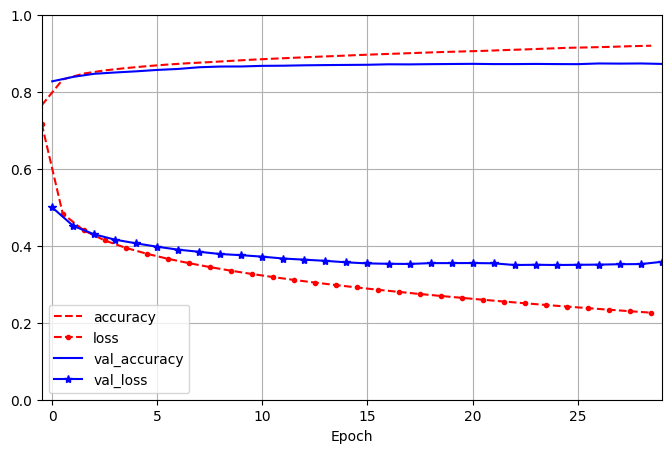

In [37]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

1. Insights:
* The validation curves are relatively close to
    each other at first, but they get further apart over time, which shows that
    there’s a little bit of overfitting.

* The validation error is
    computed at the end of each epoch, while the training error is computed
    using a running mean during each epoch, so the training curve should be
    shifted by half an epoch to the left. If you do that, you will see that the
    training and validation curves overlap almost perfectly at the beginning of
    training. 

* Keras just continues training where it left off:
    you should be able to reach about 89.8% validation accuracy, while the
    training accuracy will continue to rise up to 100% (this is not always the
    case). Use fit() method again.

* If you are not satisfied with the performance of your model, you should go
    back and tune the hyperparameters. The first one to check is the learning
    rate. If that doesn’t help, try another optimizer (and always retune the
    learning rate after changing any hyperparameter). If the performance is still
    not great, then try tuning model hyperparameters such as the number of
    layers, the number of neurons per layer, and the types of activation
    functions to use for each hidden layer. You can also try tuning other
    hyperparameters, such as the batch size (it can be set in the fit() method
    using the batch_size argument, which defaults to 32)

* . Once you are satisfied
    with your model’s validation accuracy, you should evaluate it on the test set
    to estimate the generalization error before you deploy the model to
    production. You can easily do this using the evaluate() method (it also
    supports several other arguments, such as batch_size and
    sample_weight).

In [38]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8718 - loss: 0.3735


[0.3751094341278076, 0.871999979019165]

As you saw in Chapter 2, it is common to get slightly lower performance on
the test set than on the validation set, because the hyperparameters are tuned
on the validation set, not the test set (however, in this example, we did not
do any hyperparameter tuning, so the lower accuracy is just bad luck).

### Using the Model to make Predictions

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.01, 0.  , 0.89],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
import numpy as np
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [43]:
# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [45]:
"""in this example we don’t need a Flatten
layer, and instead we’re using a Normalization layer as the first layer: it
does the same thing as Scikit-Learn’s StandardScaler, but it must be fitted
to the training data using its adapt() method before you call the model’s
fit() method. """

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.2474 - loss: 1.6788 - val_RootMeanSquaredError: 0.6230 - val_loss: 0.3882
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6369 - loss: 0.4062 - val_RootMeanSquaredError: 1.2071 - val_loss: 1.4572
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6073 - loss: 0.3690 - val_RootMeanSquaredError: 0.8627 - val_loss: 0.7443
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5934 - loss: 0.3523 - val_RootMeanSquaredError: 1.4141 - val_loss: 1.9997
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5803 - loss: 0.3369 - val_RootMeanSquaredError: 0.7306 - val_loss: 0.5338
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5709 - loss: 0.3260 - val_RootMeanSquaredError: 1.4696 - val_loss: 2.1596
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5623 - los

In [46]:
rmse_test

0.5372716784477234

In [47]:
y_pred

array([[0.49581212],
       [1.2037137 ],
       [4.953097  ]], dtype=float32)

>NOTE:
The Normalization layer learns the feature means and standard deviations in the
training data when you call the adapt() method. Yet when you display the model’s
summary, these statistics are listed as non-trainable. This is because these parameters are
not affected by gradient descent.

### Building Complex Models Using the Functional API

1. Non-sequential NN:

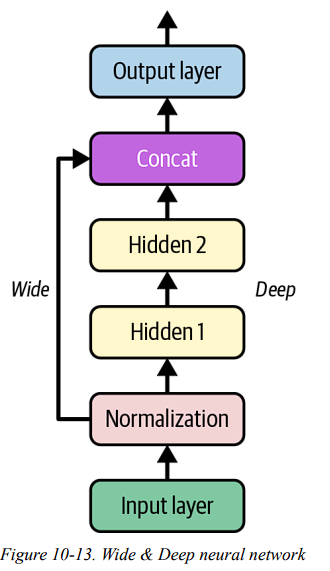

In contrast, a regular MLP
forces all the data to flow through the full stack of layers; thus, simple
patterns in the data may end up being distorted by this sequence of
transformations.




In [48]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [49]:
"""Let's build such a network to tackle the california housing problem"""

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

LOC explained:
* First, we create five layers: a Normalization layer to standardize the
    inputs, two Dense layers with 30 neurons each, using the ReLU
    activation function, a Concatenate layer, and one more Dense layer
    with a single neuron for the output layer, without any activation
    function.

* Next, we create an Input object (the variable name input_ is used to
    avoid overshadowing Python’s built-in input() function). This is a
    specification of the kind of input the model will get, including its
    shape and optionally its dtype, which defaults to 32-bit floats. A
    model may actually have multiple inputs, as you will see shortly.
 
* Then we use the Normalization layer just like a function, passing it
    the Input object. This is why this is called the functional API. Note
    that we are just telling Keras how it should connect the layers together;
    no actual data is being processed yet, as the Input object is just a data
    specification. In other words, it’s a symbolic input. The output of this
    call is also symbolic: normalized doesn’t store any actual data, it’s
    just used to construct the model.


* In the same way, we then pass normalized to hidden_layer1, which
    outputs hidden1, and we pass hidden1 to hidden_layer2, which
    outputs hidden2.

* So far we’ve connected the layers sequentially, but then we use the
    concat_layer to concatenate the input and the second hidden layer’s
    output. Again, no actual data is concatenated yet: it’s all symbolic, to
    build the model.


* Then we pass concat to the output_layer, which gives us the final
    output.

* Lastly, we create a Keras Model, specifying which inputs and outputs
    to use.

In [50]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.5455 - loss: 2.5320 - val_RootMeanSquaredError: 1.1106 - val_loss: 1.2335
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7197 - loss: 0.5194 - val_RootMeanSquaredError: 0.9507 - val_loss: 0.9038
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6510 - loss: 0.4240 - val_RootMeanSquaredError: 2.3698 - val_loss: 5.6161
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6362 - loss: 0.4050 - val_RootMeanSquaredError: 2.4236 - val_loss: 5.8739
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6289 - loss: 0.3957 - val_RootMeanSquaredError: 2.0021 - val_loss: 4.0084
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6199 - loss: 0.3845 - val_RootMeanSquaredError: 1.6072 - val_loss: 2.5831
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6066 - loss: 0.3681 -

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(3, 8))
  warnings.warn(msg)


In [52]:
tf.random.set_seed(42)  # extra code

In [53]:
""" if you want to send a subset of the features through the wide path
and a different subset (possibly overlapping) through the deep path, as
illustrated in Figure 10-14. 
In this case, one solution is to use multiple
inputs. For example, suppose we want to send five features through the
wide path (features 0 to 4), and six features through the deep path (features
2 to 7)"""

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

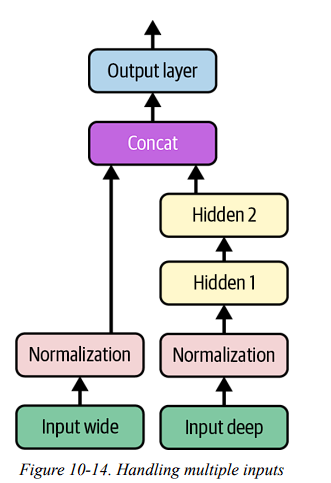

* Each Dense layer is created and called on the same line. This is a
    common practice, as it makes the code more concise without losing
    clarity. However, we can’t do this with the Normalization layer since
    we need a reference to the layer to be able to call its adapt() method
    before fitting the model.

* We used tf.keras.layers.concatenate(), which creates a
Concatenate layer and calls it with the given inputs.



In [54]:
"""we must pass a
pair of matrices (X_train_wide, X_train_deep), one per input. The
same is true for X_valid, and also for X_test and X_new when you call
evaluate() or predict():"""

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))



Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.6940 - loss: 2.9960 - val_RootMeanSquaredError: 1.5398 - val_loss: 2.3710
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7656 - loss: 0.5869 - val_RootMeanSquaredError: 1.2749 - val_loss: 1.6254
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6924 - loss: 0.4796 - val_RootMeanSquaredError: 2.2615 - val_loss: 5.1144
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6613 - loss: 0.4374 - val_RootMeanSquaredError: 2.2915 - val_loss: 5.2511
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6474 - loss: 0.4194 - val_RootMeanSquaredError: 2.3819 - val_loss: 5.6733
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6283 - loss: 0.3948 - val_RootMeanSquaredError: 1.9713 - val_loss: 3.8860
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6209 - los

>TIP: Instead of passing a tuple (X_train_wide, X_train_deep), you can pass a dictionary
{"input_wide": X_train_wide, "input_deep": X_train_deep}, if you set
name="input_wide" and name="input_deep" when creating the inputs. This is highly
recommended when there are many inputs, to clarify the code and avoid getting the
order wrong

There are also many use cases in which you may want to have multiple
outputs:

1. The task may demand it. For instance, you may want to locate and
classify the main object in a picture. This is both a regression tasks and
a classification task.

2. Similarly, you may have multiple independent tasks based on the same
data. Sure, you could train one neural network per task, but in many
cases you will get better results on all tasks by training a single neural
network with one output per task. This is because the neural network
can learn features in the data that are useful across tasks. For example,
you could perform multitask classification on pictures of faces, using
one output to classify the person’s facial expression (smiling,
surprised, etc.) and another output to identify whether they are wearing
glasses or not.

3. Another use case is as a regularization technique (i.e., a training
constraint whose objective is to reduce overfitting and thus improve
the model’s ability to generalize). For example, you may want to add
an auxiliary output in a neural network architecture (see Figure 10-15)
to ensure that the underlying part of the network learns something
useful on its own, without relying on the rest of the network.

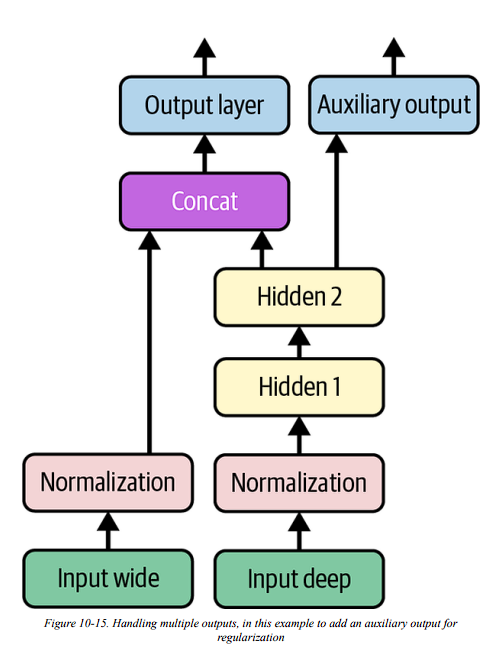




Adding an Auxiliary output for regularization

In [56]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [57]:
"""Adding an extra output is quite easy: we just connect it to the appropriate
layer and add it to the model’s list of outputs. """

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [58]:
"""we want to
give the main output’s loss a much greater weight. Luckily, it is possible to
set all the loss weights when compiling the model:
"""
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])


>TIP:
Instead of passing a tuple loss=("mse", "mse"), you can pass a dictionary loss=
{"output": "mse", "aux_output": "mse"}, assuming you created the output layers
with name="output" and name="aux_output". Just like for the inputs, this clarifies the
code and avoids errors when there are several outputs. You can also pass a dictionary for
loss_weights.

In [59]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - dense_2_RootMeanSquaredError: 1.8238 - dense_2_loss: 3.4412 - dense_3_RootMeanSquaredError: 2.1348 - dense_3_loss: 4.6608 - loss: 3.5631 - val_dense_2_RootMeanSquaredError: 1.3646 - val_dense_2_loss: 1.8615 - val_dense_3_RootMeanSquaredError: 1.0204 - val_dense_3_loss: 1.0410 - val_loss: 1.7801
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.8245 - dense_2_loss: 0.6812 - dense_3_RootMeanSquaredError: 0.9293 - dense_3_loss: 0.8661 - loss: 0.6997 - val_dense_2_RootMeanSquaredError: 0.7401 - val_dense_2_loss: 0.5477 - val_dense_3_RootMeanSquaredError: 1.2291 - val_dense_3_loss: 1.5100 - val_loss: 0.6441
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.7149 - dense_2_loss: 0.5114 - dense_3_RootMeanSquaredError: 0.7667 - dense_3_loss: 0.5881 - loss: 0.5191 - val_dense_2_RootMeanSquaredError: 0.7814 - val_dense_2_loss: 0.6104 - val_dense_3_RootMeanSquaredError: 0.8

In [61]:
"""When we evaluate the model, Keras returns the weighted sum of the losses,
as well as all the individual losses and metrics:"""

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_2_RootMeanSquaredError: 0.5846 - dense_2_loss: 0.3418 - dense_3_RootMeanSquaredError: 0.6458 - dense_3_loss: 0.4172 - loss: 0.3494


>TIP:
If you set return_dict=True, then evaluate() will return a dictionary instead of a big
tuple.

In [62]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [63]:
"""The predict() method returns a tuple, and it does not have a return_dict
argument to get a dictionary instead. However, you can create one using
model.output_names:"""

y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


### Using Subclassing API to Build Dynamic Models

1. the
framework can infer shapes and check types, so errors can be caught early
(i.e., before any data ever goes through the model). It’s also fairly
straightforward to debug, since the whole model is a static graph of layers.
But the flip side is just that: it’s static. Some models involve loops, varying
shapes, conditional branching, and other dynamic behaviors. For such
cases, or simply if you prefer a more imperative programming style, the
subclassing API is for you.


In [64]:
"""With this approach, you subclass the Model class, create the layers you need
in the constructor, and use them to perform the computations you want in
the call() method. For example, creating an instance of the following
WideAndDeepModel class gives us an equivalent model to the one we just
built with the functional API:"""

class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")


In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.3153 - RootMeanSquaredError_1: 1.9759 - loss: 2.0095 - mse_loss: 3.9926 - val_RootMeanSquaredError: 0.8470 - val_RootMeanSquaredError_1: 3.0382 - val_loss: 1.5687 - val_mse_loss: 9.2261
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7202 - RootMeanSquaredError_1: 1.0096 - loss: 0.5691 - mse_loss: 1.0201 - val_RootMeanSquaredError: 0.7100 - val_RootMeanSquaredError_1: 1.9513 - val_loss: 0.8344 - val_mse_loss: 3.8057
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6712 - RootMeanSquaredError_1: 0.8568 - loss: 0.4791 - mse_loss: 0.7344 - val_RootMeanSquaredError: 0.6557 - val_RootMeanSquaredError_1: 1.5016 - val_loss: 0.6124 - val_mse_loss: 2.2540
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6502 - RootMeanSquaredError_1: 0.8057 - loss: 0.4455 - mse_loss: 0.6494 - val_RootMeanSquaredError: 0.6687 - val_RootMeanSquaredEr

* this extra flexibility does come at a
cost: your model’s architecture is hidden within the call() method, so
Keras cannot easily inspect it; the model cannot be cloned using
tf.keras.models.clone_model(); and when you call the summary()
method, you only get a list of layers, without any information on how they
are connected to each other. Moreover, Keras cannot check types and
shapes ahead of time, and it is easier to make mistakes. So unless you really
need that extra flexibility, you should probably stick to the sequential API
or the functional API.

### Saving and Restoring a Model

In [69]:
# extra code – delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [70]:
model.export("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


Saved artifact at 'my_keras_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  1382354182096: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  1382354181904: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  1382354184400: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  1382354183248: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  1382350772880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382350776144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382350766160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382350775952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1382350777104: TensorSpec(shape=(), dtype=tf.resou

In [72]:
from pathlib import Path

# extra code – show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model\assets
my_keras_model\fingerprint.pb
my_keras_model\saved_model.pb
my_keras_model\variables
my_keras_model\variables\variables.data-00000-of-00001
my_keras_model\variables\variables.index


In Keras 3, it is no longer possible to load a TensorFlow SavedModel as a Keras model. However, you can load a SavedModel as a tf.keras.layers.TFSMLayer layer, but be aware that this layer can only be used for inference: no training.



In [73]:
tfsm_layer = tf.keras.layers.TFSMLayer("my_keras_model")
y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

In [74]:
model.save_weights("my_weights.weights.h5")

In [75]:
model.load_weights("my_weights.weights.h5")

In [76]:
model.save("my_model.keras")

* In particular, the
saved_model.pb file contains the model’s architecture and logic in the form
of a serialized computation graph, so you don’t need to deploy the model’s
source code in order to use it in production; the SavedModel is sufficient.

* The keras_metadata.pb file
contains extra information needed by Keras. The variables subdirectory
contains all the parameter values (including the connection weights, the
biases, the normalization statistics, and the optimizer’s parameters),
possibly split across multiple files if the model is very large.

* Lastly, the
assets directory may contain extra files, such as data samples, feature
names, class names, and so on. By default, the assets directory is empty.
Since the optimizer is also saved, including its hyperparameters and any
state it may have, after loading the model you can continue training if you
want.

>NOTE:
If you set save_format="h5" or use a filename that ends with .h5, .hdf5, or .keras, then
Keras will save the model to a single file using a Keras-specific format based on the
HDF5 format. However, most TensorFlow deployment tools require the SavedModel
format instead.



### Loading Model

In [78]:
"""You will typically have a script that trains a model and saves it, and one or
more scripts (or web services) that load the model and use it to evaluate it
or to make predictions."""
loaded_model = tf.keras.models.load_model(
    "my_model.keras",
    custom_objects={"WideAndDeepModel": WideAndDeepModel}
)

* You can also use save_weights() and load_weights() to save and load
only the parameter values. This includes the connection weights, biases,
preprocessing stats, optimizer state, etc. The parameter values are saved in
one or more files such as my_weights.data-00004-of-00052, plus an index
file like my_weights.index.

* Saving just the weights is faster and uses less disk space than saving the
whole model, so it’s perfect to save quick checkpoints during training. If
you’re training a big model, and it takes hours or days, then you must save
checkpoints regularly in case the computer crashes. But how can you tell
the fit() method to save checkpoints? Use callbacks.

### Using Callbacks

In [79]:
shutil.rmtree("my_checkpoints", ignore_errors=True)  # extra code

In [80]:
"""The fit() method accepts a callbacks argument that lets you specify a
list of objects that Keras will call before and after training, before and after
each epoch, and even before and after processing each batch. For example,
the ModelCheckpoint callback saves checkpoints of your model at regular
intervals during training, by default at the end of each epoch:"""

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6012 - RootMeanSquaredError_1: 0.6824 - loss: 0.3720 - mse_loss: 0.4658 - val_RootMeanSquaredError: 1.3436 - val_RootMeanSquaredError_1: 0.7517 - val_loss: 1.6813 - val_mse_loss: 0.5649
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5937 - RootMeanSquaredError_1: 0.6755 - loss: 0.3629 - mse_loss: 0.4565 - val_RootMeanSquaredError: 1.0639 - val_RootMeanSquaredError_1: 0.8670 - val_loss: 1.0939 - val_mse_loss: 0.7515
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5864 - RootMeanSquaredError_1: 0.6614 - loss: 0.3533 - mse_loss: 0.4376 - val_RootMeanSquaredError: 0.7220 - val_RootMeanSquaredError_1: 0.6456 - val_loss: 0.5108 - val_mse_loss: 0.4168
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5818 - RootMeanSquaredError_1: 0.6521 - loss: 0.3473 - mse_loss: 0.4254 - val_RootMeanSquaredError: 0.8247 - val_RootMeanSquaredEr

1. way to implement early stopping:

* if you use a validation set during training, you can set save_
best_only=True when creating the ModelCheckpoint. In this case, it will
only save your model when its performance on the validation set is the best
so far. 

* Another way is to use the EarlyStopping callback. It will interrupt training
when it measures no progress on the validation set for a number of epochs
(defined by the patience argument), and if you set
restore_best_weights=True it will roll back to the best model at the end
of training. You can combine both callbacks to save checkpoints of your
model in case your computer crashes, and interrupt training early when
there is no more progress, to avoid wasting time and resources and to
reduce overfitting.

The number of epochs can be set to a large value since training will stop
automatically when there is no more progress (just make sure the learning
rate is not too small, or else it might keep making slow progress until the
end). The EarlyStopping callback will store the weights of the best model
in RAM, and it will restore them for you at the end of training.




In [82]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5638 - RootMeanSquaredError_1: 0.6094 - loss: 0.3233 - mse_loss: 0.3715 - val_RootMeanSquaredError: 0.7566 - val_RootMeanSquaredError_1: 0.7442 - val_loss: 0.5705 - val_mse_loss: 0.5537
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5634 - RootMeanSquaredError_1: 0.6081 - loss: 0.3227 - mse_loss: 0.3699 - val_RootMeanSquaredError: 0.9096 - val_RootMeanSquaredError_1: 0.6762 - val_loss: 0.7903 - val_mse_loss: 0.4572
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5636 - RootMeanSquaredError_1: 0.6066 - loss: 0.3228 - mse_loss: 0.3681 - val_RootMeanSquaredError: 0.9772 - val_RootMeanSquaredError_1: 0.8353 - val_loss: 0.9292 - val_mse_loss: 0.6976
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5615 - RootMeanSquaredError_1: 0.6041 - loss: 0.3203 - mse_loss: 0.3651 - val_RootMeanSquaredError: 0.7907 - val_RootMeanSquar

In [83]:
"""If you need extra control, you can easily write your own custom callbacks.
For example, the following custom callback will display the ratio between
the validation loss and the training loss during training (e.g., to detect
overfitting):
"""

class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [84]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.67
Epoch=1, val/train=1.60
Epoch=2, val/train=2.38
Epoch=3, val/train=1.62
Epoch=4, val/train=1.82
Epoch=5, val/train=1.26
Epoch=6, val/train=1.43
Epoch=7, val/train=1.18
Epoch=8, val/train=1.69
Epoch=9, val/train=2.14


* As you might expect, you can implement on_train_begin(),
on_train_end(), on_epoch_begin(), on_epoch_end(),
on_batch_begin(), and on_batch_end(). Callbacks can also be used
during evaluation and predictions, should you ever need them (e.g., for
debugging). For evaluation, you should implement on_test_begin(),
on_test_end(), on_test_batch_begin(), or on_test_batch_end(),
which are called by evaluate(). For prediction, you should implement
on_predict_begin(), on_predict_end(), on_predict_batch_begin(),
or on_predict_batch_end(), which are called by predict().

### Using TensorBoard for Visualization

1. TensorBoard is a great interactive visualization tool that you can use to
view the learning curves during training, compare curves and metrics
between multiple runs, visualize the computation graph, analyze training
statistics, view images generated by your model, visualize complex
multidimensional data projected down to 3D and automatically clustered for
you, profile your network (i.e., measure its speed to identify bottlenecks),
and more!

2. To use TensorBoard, you must modify your program so that it outputs the
data you want to visualize to special binary logfiles called event files. Each
binary data record is called a summary. The TensorBoard server will
monitor the log directory, and it will automatically pick up the changes and
update the visualizations: this allows you to visualize live data (with a short
delay), such as the learning curves during training.

3.  In general, you want to
point the TensorBoard server to a root log directory and configure your
program so that it writes to a different subdirectory every time it runs. This
way, the same TensorBoard server instance will allow you to visualize and
compare data from multiple runs of your program, without getting
everything mixed up.


In [85]:
shutil.rmtree("my_logs", ignore_errors=True)

In [86]:
"""Let’s name the root log directory my_logs, and let’s define a little function
that generates the path of the log subdirectory based on the current date and
time, so that it’s different at every run:
"""
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()



In [87]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4. The good news is that Keras provides a convenient TensorBoard()
callback that will take care of creating the log directory for you (along with
its parent directories if needed), and it will create event files and write
summaries to them during training. It will measure your model’s training
and validation loss and metrics (in this case, the MSE and RMSE), and it
will also profile your neural network.

In [88]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.6707 - loss: 2.9023 - val_RootMeanSquaredError: 0.9381 - val_loss: 0.8800
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.9080 - loss: 0.8257 - val_RootMeanSquaredError: 0.8488 - val_loss: 0.7205
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.8573 - loss: 0.7363 - val_RootMeanSquaredError: 0.7946 - val_loss: 0.6314
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8197 - loss: 0.6733 - val_RootMeanSquaredError: 0.7631 - val_loss: 0.5824
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7890 - loss: 0.6237 - val_RootMeanSquaredError: 0.7366 - val_loss: 0.5426
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7628 - loss: 0.5830 - val_RootMeanSquaredError: 0.7149 - val_loss: 0.5110
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7407 - los

In [89]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2025_02_06_14_10_18
  run_2025_02_06_14_10_26
  run_2025_02_07_08_30_09
    train
      events.out.tfevents.1738897250.DESKTOP-0675KPG.30192.0.v2
      plugins
        profile
          2025_02_07_03_00_52
            DESKTOP-0675KPG.xplane.pb
    validation
      events.out.tfevents.1738897253.DESKTOP-0675KPG.30192.1.v2


5. That’s all there is to it! In this example, it will profile the network between
batches 100 and 200 during the first epoch. Why 100 and 200? Well, it
often takes a few batches for the neural network to “warm up”, so you don’t
want to profile too early, and profiling uses resources, so it’s best not to do
it for every batch.

>TIP:
If you’re running everything on your own machine, it’s possible to start TensorBoard by
executing tensorboard --logdir=./my_logs in a terminal. You must first activate the
Conda environment in which you installed TensorBoard, and go to the handson-ml3
directory. Once the server is started, visit http://localhost:6006.


In [90]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

Note: if you prefer to access TensorBoard in a separate tab, click the "localhost:6006" link below:

In [92]:
# extra code
import sys
if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

In [93]:
"""TensorFlow offers a lower-level API in the tf.summary
package. The following code creates a SummaryWriter using the
create_file_writer() function, and it uses this writer as a Python
context to log scalars, histograms, images, audio, and text, all of which can
then be visualized using TensorBoard:
"""

test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
    


In [94]:
# extra code – lists all running TensorBoard server instances

from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:03:39 ago; pid 11956)


In [95]:
!kill 11956

kill: 11956: No such process


>TIP: TIP
You can share your results online by publishing them to https://tensorboard.dev. For
this, just run !tensorboard dev upload --logdir ./my_logs. The first time, it will
ask you to accept the terms and conditions and authenticate. Then your logs will be
uploaded, and you will get a permanent link to view your results in a TensorBoard
interface.

### Fine-Tuning NN Hyperparams:

1. Keras Tuner library:

In [96]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [98]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [108]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

* The first part of the function defines the hyperparameters. For example,
hp.Int("n_hidden", min_value=0, max_value=8, default=2) checks
whether a hyperparameter named "n_hidden" is already present in the
HyperParameters object hp, and if so it returns its value. If not, then it
registers a new integer hyperparameter named "n_hidden", whose possible
values range from 0 to 8 (inclusive), and it returns the default value, which
is 2 in this case (when default is not set, then min_value is returned).

* The
"n_neurons" hyperparameter is registered in a similar way.

* The
"learning_rate" hyperparameter is registered as a float ranging from 10
to 10 , and since sampling="log", learning rates of all scales will be
sampled equally.

*  Lastly, the optimizer hyperparameter is registered with
two possible values: "sgd" or "adam" (the default value is the first one,
which is "sgd" in this case). Depending on the value of optimizer, we
create an SGD optimizer or an Adam optimizer with the given learning rate.

* The second part of the function just builds the model using the
hyperparameter values. It creates a Sequential model starting with a
Flatten layer, followed by the requested number of hidden layers (as
determined by the n_hidden hyperparameter) using the ReLU activation
function, and an output layer with 10 neurons (one per class) using the
softmax activation function. Lastly, the function compiles the model and
returns it.


In [106]:
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner~=1.4.6

In [110]:
"""Now if you want to do a basic random search, you can create a
kt.RandomSearch tuner, passing the build_model function to the
constructor, and call the tuner’s search() method:"""

random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 41s]
val_accuracy: 0.8312000036239624

Best val_accuracy So Far: 0.8565999865531921
Total elapsed time: 00h 03m 43s


In [111]:
"""objective is
set to "val_accuracy", the tuner prefers models with a higher validation
accuracy, so once the tuner has finished searching, you can get the best
models like this:"""

top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]


In [112]:
"""You can also call get_best_hyperparameters() to get the
kt.HyperParameters of the best models:"""

top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values


{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [113]:
"""Each tuner is guided by a so-called oracle: before each trial, the tuner asks
the oracle to tell it what the next trial should be. The RandomSearch tuner
uses a RandomSearchOracle, which is pretty basic: it just picks the next
trial randomly, as we saw earlier. Since the oracle keeps track of all the
trials, you can ask it to give you the best one, and you can display a
summary of that trial:"""

best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()


Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8565999865531921


In [114]:
best_trial.metrics.get_last_value("val_accuracy")

0.8565999865531921

In [115]:
"""If you are happy with the best model’s performance, you may continue
training it for a few epochs on the full training set (X_train_full and
y_train_full), then evaluate it on the test set, and deploy it to production
"""
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8730 - loss: 0.3451
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8777 - loss: 0.3327
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8811 - loss: 0.3231
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8847 - loss: 0.3128
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8884 - loss: 0.3037
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8904 - loss: 0.2962
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8934 - loss: 0.2885
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8948 - loss: 0.2825
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8962 - loss: 0.2758
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8986 - loss: 0.2696
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8574 - loss: 0.4249


In [116]:
"""the following class builds the same model as before, with the
same hyperparameters, but it also uses a Boolean "normalize"
hyperparameter to control whether or not to standardize the training data
before fitting the model:"""

class MyClassificationHyperModel(kt.HyperModel):
    def build(self,hp):
        return build_model(hp)
    
    def fit(self,hp,model,X,y,**kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer()
        return model.fit(X,y,**kwargs)
    
    

In [117]:
"""You can then pass an instance of this class to the tuner of your choice,
instead of passing the build_model function."""

hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")


* This tuner is similar to the HalvingRandomSearchCV class we discussed in
Chapter 2: it starts by training many different models for few epochs, then it
eliminates the worst models and keeps only the top 1 / factor models
(i.e., the top third in this case), repeating this selection process until a single
model is left.

* The max_epochs argument controls the max number of
epochs that the best model will be trained for. The whole process is
repeated twice in this case (hyperband_iterations=2). The total number
of training epochs across all models for each hyperband iteration is about
max_epochs * (log(max_epochs) / log(factor)) ** 2, so it’s about
44 epochs in this example. The other arguments are the same as for
kt.RandomSearch.



In [118]:
"""Let’s run the Hyperband tuner now. We’ll use the TensorBoard callback,
this time pointing to the root log directory (the tuner will take care of using
a different subdirectory for each trial), as well as an EarlyStopping
callback:"""

root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 16 Complete [00h 00m 01s]

Best val_accuracy So Far: 0.8375999927520752
Total elapsed time: 00h 03m 41s

Search: Running Trial #17

Value             |Best Value So Far |Hyperparameter
7                 |7                 |n_hidden
131               |100               |n_neurons
0.00011511        |0.0012483         |learning_rate
sgd               |sgd               |optimizer
True              |False             |normalize
4                 |4                 |tuner/epochs
0                 |2                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |1                 |tuner/round



Traceback (most recent call last):
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\tuners\hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haide\AppData\Local\Temp\ipykernel_30192\4002623128.py", line 13, in fit
    X = norm_layer()
        ^^^^^^^^^^^^
TypeError: TFDataLayer.__call__() missing 1 required positional argument: 'inputs'


* Hyperband is smarter than pure random search in the way it allocates
resources, but at its core it still explores the hyperparameter space
randomly; it’s fast, but coarse. However, Keras Tuner also includes a
kt.BayesianOptimization tuner: this algorithm gradually learns which
regions of the hyperparameter space are most promising by fitting a
probabilistic model called a Gaussian process. This allows it to gradually
zoom in on the best hyperparameters. The downside is that the algorithm
has its own hyperparameters: alpha represents the level of noise you expect
in the performance measures across trials (it defaults to 10 ), and beta
specifies how much you want the algorithm to explore, instead of simply
exploiting the known good regions of hyperparameter space (it defaults to
2.6).

In [77]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 2 Complete [00h 00m 01s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 01s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
4                 |5                 |n_hidden
74                |25                |n_neurons
0.0090513         |0.00065625        |learning_rate
adam              |sgd               |optimizer



Traceback (most recent call last):
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: MyClassificationHyperModel.fit() missing 1 required positional argument: 'y'


In [ ]:
# extra code
import sys
if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

>TIP:
In general you will get more bang for your buck by increasing the number of layers
instead of the number of neurons per layer.
